# Imports

In [14]:
# A study was conducted on a 60-acre farm field in Lee County AL, on which a 2.4-acre sampling grid was established. Using this grid, soil samples were collected from 25 sampling sites. At each site, 5 soil cores (3.8 cm2 diameter) were collected to a 30-cm depth. These cores were collected from a 1-meter square area, with a core taken at each corner and one from the center. Each soil core was divided into 6 depth increments (0-5, 5-10, 10-15, 15-20, 20-25, and 25-30) and analyzed separately (i.e., a total of 750 samples). Soil bulk density and measured C concentration (using a LECO C/N dry combustion analyzer) were used to calculate total C content (mass per volume of soil) for each sample.

In [15]:
import pandas as pd

In [16]:
import openpyxl as px
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from sklearn.linear_model import LinearRegression
import scipy
import geopy.distance

# now do this in an interactive plot
import plotly.express as px
import plotly.graph_objects as go

# Data

In [17]:
data_file = 'data/soil_data.csv'
df = pd.read_csv(data_file)
data = np.load('data/soil_data.npy', allow_pickle=True)

In [18]:
print(df.shape)
print(df.columns)
df.head()

(750, 17)
Index(['Unnamed: 0', 'id', 'c_percent', 'n_percent', 'lat', 'lon', 'z', 'site',
       'site_alt', 'site_alt_id', 'lower_bin', 'upper_bin', '_x', '_y', 'core',
       'x', 'y'],
      dtype='object')


,Unnamed: 0,id,c_percent,n_percent,lat,lon,z,site,site_alt,site_alt_id,lower_bin,upper_bin,_x,_y,core,x,y
0,0,1-1-A,1.104222,1.334,32.419178,-85.414727,-2.5,0,0_A,A,-5.0,0.0,5929.202411,-6263.257071,1,5929.202411,-6263.257071
1,1,1-1-B,0.475002,0.451,32.419178,-85.414727,-7.5,0,0_B,B,-10.0,-5.0,5929.202411,-6263.257071,1,5929.202411,-6263.257071
2,2,1-1-C,0.386305,0.397,32.419178,-85.414727,-12.5,0,0_C,C,-15.0,-10.0,5929.202411,-6263.257071,1,5929.202411,-6263.257071
3,3,1-1-D,0.310593,0.309,32.419178,-85.414727,-17.5,0,0_D,D,-20.0,-15.0,5929.202411,-6263.257071,1,5929.202411,-6263.257071
4,4,1-1-E,0.333903,0.319,32.419178,-85.414727,-22.5,0,0_E,E,-25.0,-20.0,5929.202411,-6263.257071,1,5929.202411,-6263.257071


In [19]:
site_stats = df.groupby('site').agg({
    'c_percent': ['mean', 'std', 'min', 'max'],
    'n_percent': ['mean', 'std', 'min', 'max'],
    'lat': 'first',
    'lon': 'first',
    'site_alt_id': 'first'
}).reset_index()
site_stats.columns = ['site', 
                      'c_percent_mean', 'c_percent_std', 'c_percent_min', 'c_percent_max', 
                      'n_percent_mean', 'n_percent_std', 'n_percent_min', 'n_percent_max',
                      'lat', 'lon', 'site_alt_id']

In [20]:
site_stats.head()

,site,c_percent_mean,c_percent_std,c_percent_min,c_percent_max,n_percent_mean,n_percent_std,n_percent_min,n_percent_max,lat,lon,site_alt_id
0,0,0.405029,0.206863,0.097421,1.104222,0.447433,0.224253,0.128,1.334,32.419178,-85.414727,A
1,1,0.463809,0.214066,0.191345,0.992811,0.507033,0.270764,0.181,1.214,32.418902,-85.413783,A
2,2,0.559871,0.350344,0.171902,1.548026,0.644167,0.516806,0.186,2.362,32.418566,-85.412972,A
3,3,0.569245,0.326314,0.150449,1.361320,0.599500,0.349361,0.224,1.401,32.418692,-85.412371,A
4,4,0.423010,0.165062,0.175240,0.872182,0.531467,0.266281,0.155,1.379,32.419578,-85.413746,A


# Data vis

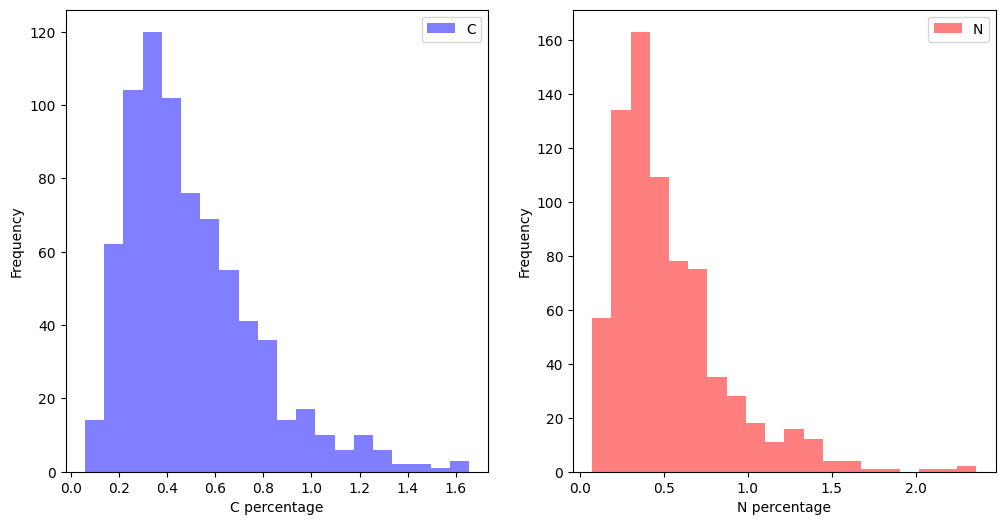

In [21]:
# make histogram of C and N percentages
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].hist(df['c_percent'], bins=20, color='blue', alpha=0.5, label='C')
ax[0].set_xlabel('C percentage')
ax[0].set_ylabel('Frequency')
ax[0].legend()
ax[1].hist(df['n_percent'], bins=20, color='red', alpha=0.5, label='N')
ax[1].set_xlabel('N percentage')
ax[1].set_ylabel('Frequency')
ax[1].legend()
plt.show()

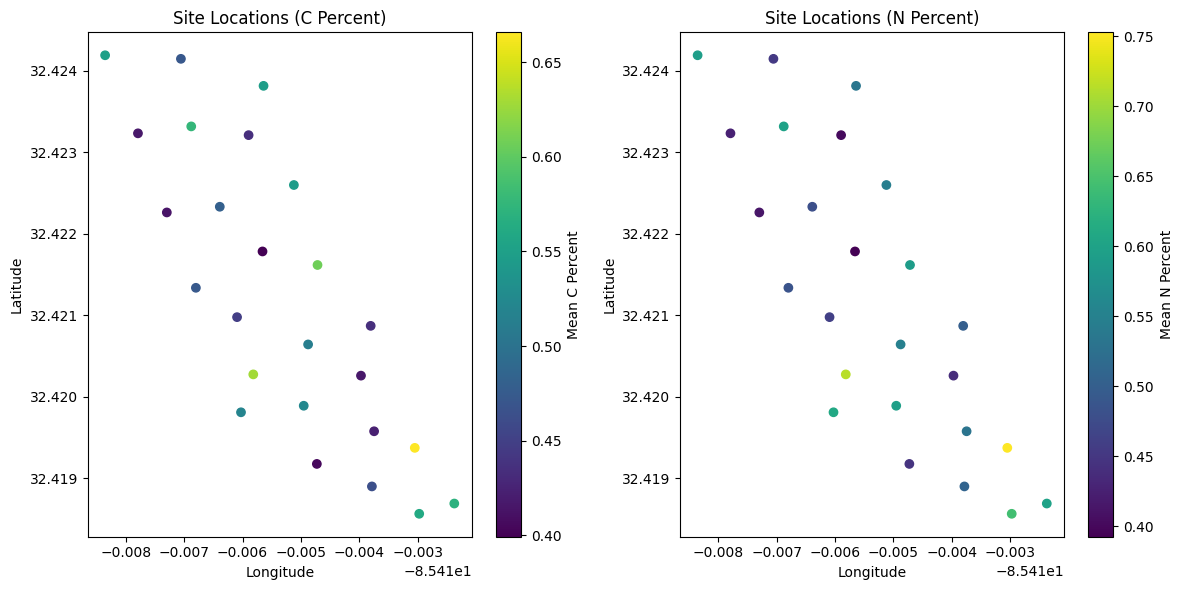

In [22]:
# Plot the site locations for C and N percentages in subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for C Percent
sc1 = axs[0].scatter(site_stats['lon'], site_stats['lat'], c=site_stats['c_percent_mean'], cmap='viridis')
cbar1 = plt.colorbar(sc1, ax=axs[0], label='Mean C Percent')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')
axs[0].set_title('Site Locations (C Percent)')

# Plot for N Percent
sc2 = axs[1].scatter(site_stats['lon'], site_stats['lat'], c=site_stats['n_percent_mean'], cmap='viridis')
cbar2 = plt.colorbar(sc2, ax=axs[1], label='Mean N Percent')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Latitude')
axs[1].set_title('Site Locations (N Percent)')

plt.tight_layout()
plt.show()

/home/jac2462@uta.edu/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


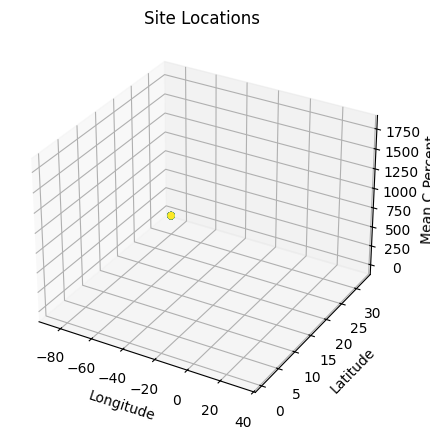

In [23]:
# make a 3d version of the plot
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
# ax.plot_trisurf(triang, site_stats['c_percent_mean'], cmap='viridis', alpha=0.6)
ax.scatter(site_stats['lon'], site_stats['lat'], site_stats['c_percent_mean'], c=site_stats['c_percent_mean'], cmap='viridis')
# draw line at each point to the surface of z=0
average = np.mean(site_stats['c_percent_mean'])
zz_mean = average

max_lon = site_stats['lon'].max()
min_lon = site_stats['lon'].min()
max_lat = site_stats['lat'].max()
min_lat = site_stats['lat'].min()

sorted_site_stats_x = site_stats['lon'].sort_values()
sorted_site_stats_y = site_stats['lat'].sort_values()

for i in range(len(site_stats)):
    
    next_highest_x = sorted_site_stats_x[sorted_site_stats_x > site_stats['lon'][i]].min()
    next_lowest_x = sorted_site_stats_x[sorted_site_stats_x < site_stats['lon'][i]].max()
    next_highest_y = sorted_site_stats_y[sorted_site_stats_y > site_stats['lat'][i]].min()
    next_lowest_y = sorted_site_stats_y[sorted_site_stats_y < site_stats['lat'][i]].max()

    ax.plot([site_stats['lon'][i], site_stats['lon'][i]], [next_lowest_y, next_highest_y], [zz_mean, zz_mean], color='black', alpha=1)

    ax.plot([next_lowest_x, next_highest_x], [site_stats['lat'][i], site_stats['lat'][i]], [zz_mean, zz_mean], color='black', alpha=1)

for i in range(len(site_stats)):
    if site_stats['c_percent_mean'][i] > average:
        ax.plot([site_stats['lon'][i], site_stats['lon'][i]], [site_stats['lat'][i], site_stats['lat'][i]], [average, site_stats['c_percent_mean'][i]], color='red', alpha=1, linewidth=2)
    elif site_stats['c_percent_mean'][i] < average:
        ax.plot([site_stats['lon'][i], site_stats['lon'][i]], [site_stats['lat'][i], site_stats['lat'][i]], [average, site_stats['c_percent_mean'][i]], color='blue', alpha=1, linewidth=2)
    


# draw plane of best fit
model = LinearRegression()
model.fit(site_stats[['lon', 'lat']], site_stats['c_percent_mean'])
xx, yy = np.meshgrid(np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100))
zz_fit = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ax.plot_surface(xx, yy, zz_fit, alpha=0.2, color='red')

# draw blue plane at z=average
ax.plot_surface(xx, yy, zz_mean*np.ones_like(xx), alpha=0.2, color='blue')


ax.plot([min_lon, max_lon], [min_lat, max_lat], [zz_mean, zz_mean], color='black', alpha=1)
ax.plot([min_lon, max_lon], [max_lat, min_lat], [zz_mean, zz_mean], color='black', alpha=1)



ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Mean C Percent')
ax.set_title('Site Locations')
plt.show()

# fig = px.scatter_3d(site_stats, x='lon', y='lat', z='c_percent_mean', color='c_percent_mean', opacity=0.7)
# fig.update_traces(marker=dict(size=5))

# # Add surface plot for the plane of best fit
# fig.add_trace(go.Surface(z=zz_fit, x=xx[0], y=yy[:, 0], colorscale='Viridis', showscale=False, opacity=0.5))

# # Add surface plot for the plane at z=average
# fig.add_trace(go.Surface(z=zz_mean*np.ones_like(xx), x=xx[0], y=yy[:, 0], colorscale='Viridis', showscale=False, opacity=0.5))

# fig.add_trace(go.Scatter3d(x=[min_lon, max_lon], y=[min_lat, max_lat], z=[zz_mean, zz_mean], mode='lines', line=dict(color='black', width=2)))
# fig.add_trace(go.Scatter3d(x=[min_lon, max_lon], y=[max_lat, min_lat], z=[zz_mean, zz_mean], mode='lines', line=dict(color='black', width=2)))

# for i in range(len(site_stats)):
#     if site_stats['c_percent_mean'][i] > average:
#         fig.add_trace(go.Scatter3d(x=[site_stats['lon'][i], site_stats['lon'][i]], y=[site_stats['lat'][i], site_stats['lat'][i]], z=[average, site_stats['c_percent_mean'][i]], mode='lines', line=dict(color='red', width=2)))
#     elif site_stats['c_percent_mean'][i] < average:
#         fig.add_trace(go.Scatter3d(x=[site_stats['lon'][i], site_stats['lon'][i]], y=[site_stats['lat'][i], site_stats['lat'][i]], z=[average, site_stats['c_percent_mean'][i]], mode='lines', line=dict(color='blue', width=2)))
                      
                      

# fig.show()


/home/jac2462@uta.edu/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/jac2462@uta.edu/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


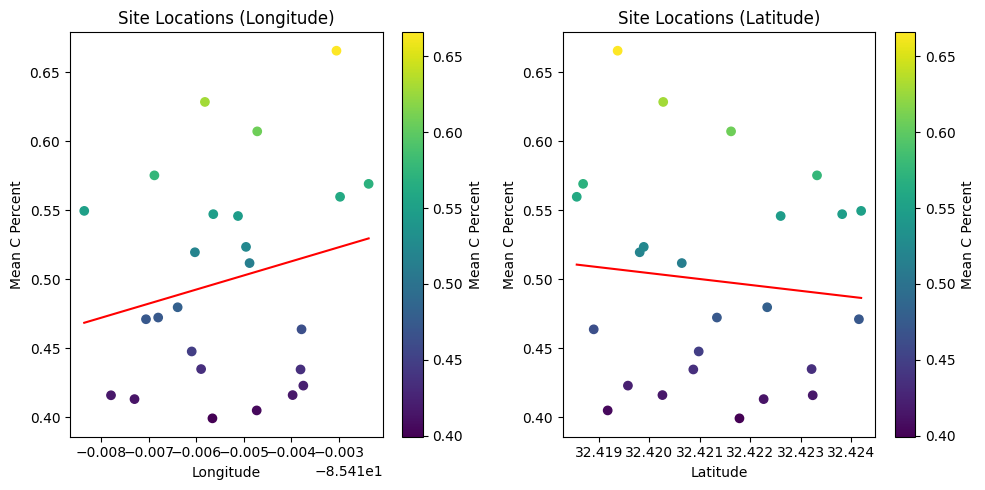

                          Plot  Coefficient   Intercept
0  Longitude vs Mean C Percent    10.216462  873.141997
1   Latitude vs Mean C Percent    -4.294177  139.721790


In [24]:
# Initialize a list to store fit parameters
fit_params = []

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# First subplot
axs[0].scatter(site_stats['lon'], site_stats['c_percent_mean'], c=site_stats['c_percent_mean'], cmap='viridis')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Mean C Percent')
axs[0].set_title('Site Locations (Longitude)')
cbar = plt.colorbar(axs[0].collections[0], ax=axs[0])
cbar.set_label('Mean C Percent')
# draw a line of best fit
model = LinearRegression()
model.fit(site_stats[['lon']], site_stats['c_percent_mean'])
x = np.array([site_stats['lon'].min(), site_stats['lon'].max()])
y = model.predict(x.reshape(-1, 1))
axs[0].plot(x, y, color='red')
fit_params.append(['Longitude vs Mean C Percent', model.coef_[0], model.intercept_])

# Second subplot
axs[1].scatter(site_stats['lat'], site_stats['c_percent_mean'], c=site_stats['c_percent_mean'], cmap='viridis')
axs[1].set_xlabel('Latitude')
axs[1].set_ylabel('Mean C Percent')
axs[1].set_title('Site Locations (Latitude)')
# draw a line of best fit
model = LinearRegression()
model.fit(site_stats[['lat']], site_stats['c_percent_mean'])
x = np.array([site_stats['lat'].min(), site_stats['lat'].max()])
y = model.predict(x.reshape(-1, 1))
axs[1].plot(x, y, color='red')
fit_params.append(['Latitude vs Mean C Percent', model.coef_[0], model.intercept_])

cbar = plt.colorbar(axs[1].collections[0], ax=axs[1])
cbar.set_label('Mean C Percent')

plt.tight_layout()
plt.show()

# Create a DataFrame to display fit parameters
fit_params_df = pd.DataFrame(fit_params, columns=['Plot', 'Coefficient', 'Intercept'])
print(fit_params_df)

(array([6., 3., 3., 1., 3., 3., 3., 1., 1., 1.]),
 array([0.39928866, 0.42593594, 0.45258322, 0.4792305 , 0.50587778,
        0.53252506, 0.55917234, 0.58581962, 0.6124669 , 0.63911418,
        0.66576146]),
 <BarContainer object of 10 artists>)

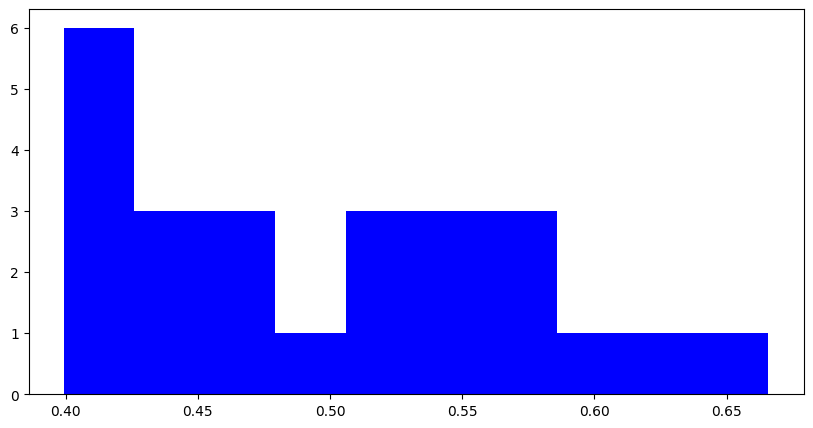

In [44]:


fig, axs = plt.subplots(1, 1, figsize=(10, 5))

# First subplot
axs.hist(site_stats['c_percent_mean'], bins=10, color='blue', alpha=1, label='C')

A study was conducted on a 60-acre farm field in Lee County AL, on which a 2.4-acre sampling grid was established. Using this grid, soil samples were collected from 25 sampling sites. At each site, 5 soil cores (3.8 cm2 diameter) were collected to a 30-cm depth. These cores were collected from a 1-meter square area, with a core taken at each corner and one from the center. Each soil core was divided into 6 depth increments (0-5, 5-10, 10-15, 15-20, 20-25, and 25-30) and analyzed separately (i.e., a total of 750 samples). Soil bulk density and measured C concentration (using a LECO C/N dry combustion analyzer) were used to calculate total C content (mass per volume of soil) for each sample.

In [26]:
x = df['x']
y = df['y']
z = df['z']
c = df['c_percent']
n = df['n_percent']

cords = np.array([x, y, z]).T

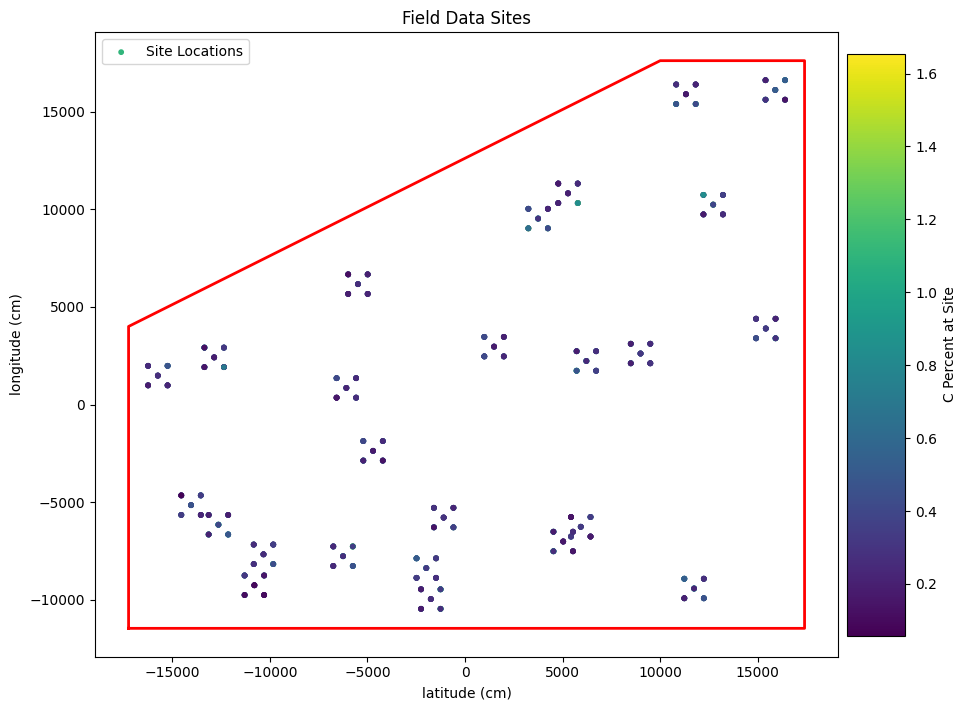

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x, y, c=c, cmap='viridis', s=10, label='Site Locations')
plt.xlabel('latitude (cm)')
plt.ylabel('longitude (cm)')
ax.set_title('Field Data Sites')
cbar = plt.colorbar(ax.collections[0], ax=ax, pad=0.01, aspect=10, shrink=0.6)
cbar.set_label('C Percent at Site')
# aspect ratio equal
ax.set_aspect('equal', adjustable='box')
pad = 1000
# fence = plt.Rectangle((np.min(x)-pad, np.min(y)-pad), (np.max(x)-np.min(x))+2*pad, (np.max(y)-np.min(y))+2*pad, fill=None, edgecolor='red', linewidth=2)
# ax.add_patch(fence)
fence = [(np.min(x)-pad, np.min(y)-pad), (np.max(x)+pad, np.min(y)-pad), (np.max(x)+pad, np.max(y)+pad), (10000, np.max(y)+pad), (np.min(x)-pad, 4000), (np.min(x)-pad, np.min(y)-pad)]
ax.plot(*zip(*fence), color='red', linewidth=2)
plt.tight_layout()
plt.legend()
plt.show()

In [28]:
feild_info = {
    'corners': [(np.min(x)-pad, np.min(y)-pad), (np.max(x)+pad, np.min(y)-pad), (np.max(x)+pad, np.max(y)+pad), (10000, np.max(y)+pad), (np.min(x)-pad, 4000), (np.min(x)-pad, np.min(y)-pad)],
    'bounds': (np.min(x)-pad, np.min(y)-pad, np.max(x)+pad, np.max(y)+pad)
}
# save this to json file
import json
with open('data/field_info.json', 'w') as f:
    json.dump(feild_info, f)

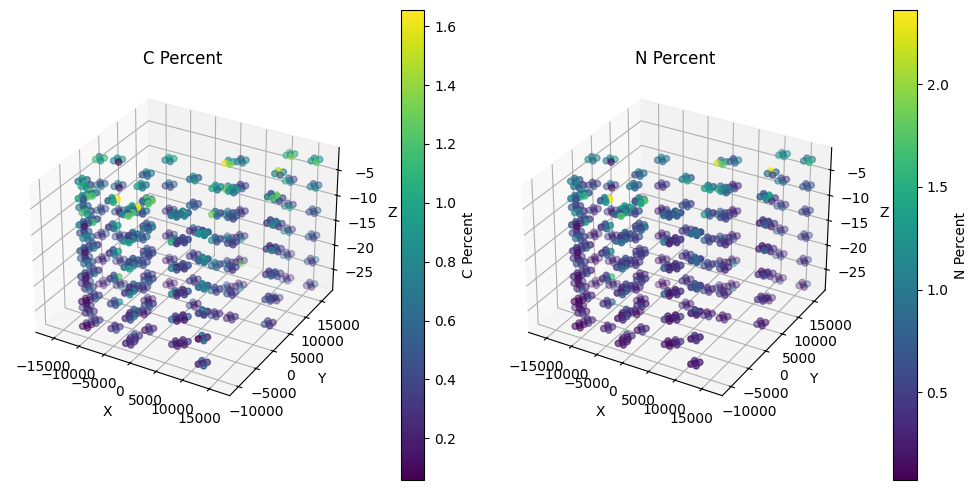

In [29]:
fig = plt.figure(figsize=(10, 5))

# First subplot for C Percent
ax1 = fig.add_subplot(121, projection='3d')
sc1 = ax1.scatter(df['x'], df['y'], df['z'], c=df['c_percent'], cmap='viridis')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('C Percent')
cbar1 = plt.colorbar(sc1, ax=ax1, pad=0.1)
cbar1.set_label('C Percent')

# Second subplot for N Percent
ax2 = fig.add_subplot(122, projection='3d')
sc2 = ax2.scatter(df['x'], df['y'], df['z'], c=df['n_percent'], cmap='viridis')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('N Percent')
cbar2 = plt.colorbar(sc2, ax=ax2, pad=0.1)
cbar2.set_label('N Percent')

plt.tight_layout()
plt.show()

# fig = px.scatter_3d(df, x='x', y='y', z='z', color='c_percent', opacity=0.7)
# fig.update_traces(marker=dict(size=5))
# fig.show()

# fig = px.scatter_3d(df, x='x', y='y', z='z', color='n_percent', opacity=0.7)
# fig.update_traces(marker=dict(size=5))
# fig.show()

/home/jac2462@uta.edu/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/jac2462@uta.edu/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/jac2462@uta.edu/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/jac2462@uta.edu/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/jac2462@uta.edu/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/jac2462@u

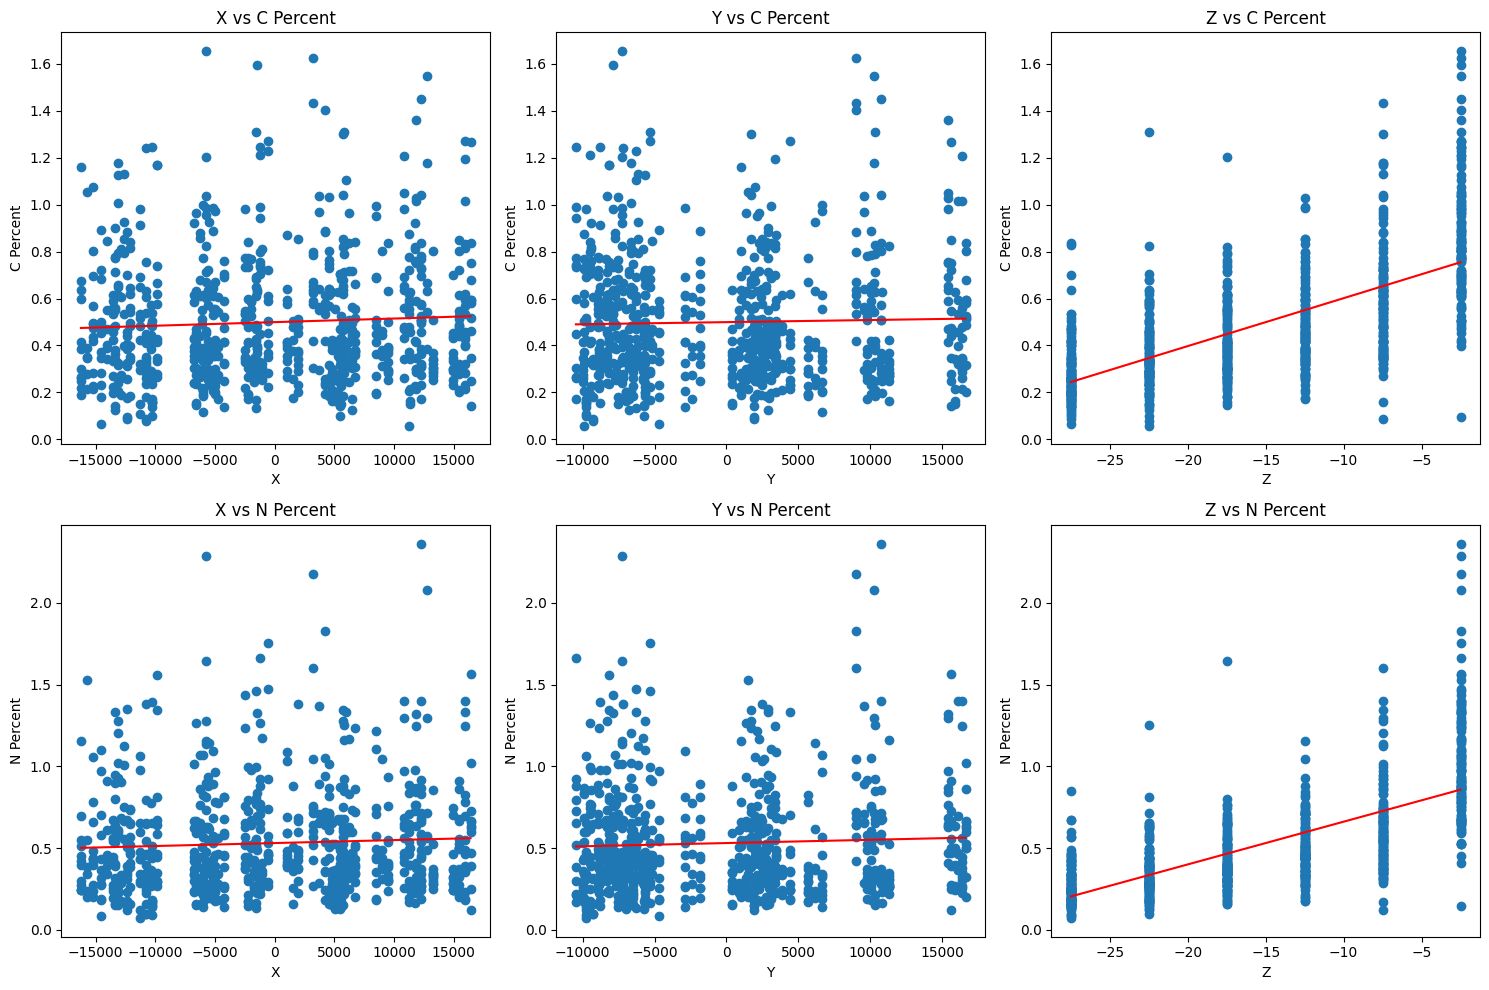

             Plot   Coefficient  Intercept
0  X vs C Percent  1.534855e-06   0.499261
1  Y vs C Percent  9.003536e-07   0.499261
2  Z vs C Percent  2.042665e-02   0.805661
3  X vs N Percent  1.811894e-06   0.530369
4  Y vs N Percent  1.985572e-06   0.530369
5  Z vs N Percent  2.612841e-02   0.922296


In [30]:
import pandas as pd

# Initialize a list to store fit parameters
fit_params = []

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# First row: C Percent
# First subplot: X vs C Percent
axs[0, 0].scatter(df['x'], df['c_percent'])
axs[0, 0].set_xlabel('X')
axs[0, 0].set_ylabel('C Percent')
axs[0, 0].set_title('X vs C Percent')
# draw a line of best fit
model = LinearRegression()
model.fit(df[['x']], df['c_percent'])
x = np.array([df['x'].min(), df['x'].max()])
y = model.predict(x.reshape(-1, 1))
axs[0, 0].plot(x, y, color='red')
fit_params.append(['X vs C Percent', model.coef_[0], model.intercept_])

# Second subplot: Y vs C Percent
axs[0, 1].scatter(df['y'], df['c_percent'])
axs[0, 1].set_xlabel('Y')
axs[0, 1].set_ylabel('C Percent')
axs[0, 1].set_title('Y vs C Percent')
# draw a line of best fit
model = LinearRegression()
model.fit(df[['y']], df['c_percent'])
x = np.array([df['y'].min(), df['y'].max()])
y = model.predict(x.reshape(-1, 1))
axs[0, 1].plot(x, y, color='red')
fit_params.append(['Y vs C Percent', model.coef_[0], model.intercept_])

# Third subplot: Z vs C Percent
axs[0, 2].scatter(df['z'], df['c_percent'])
axs[0, 2].set_xlabel('Z')
axs[0, 2].set_ylabel('C Percent')
axs[0, 2].set_title('Z vs C Percent')
# draw a line of best fit
model = LinearRegression()
model.fit(df[['z']], df['c_percent'])
x = np.array([df['z'].min(), df['z'].max()])
y = model.predict(x.reshape(-1, 1))
axs[0, 2].plot(x, y, color='red')
fit_params.append(['Z vs C Percent', model.coef_[0], model.intercept_])

# Second row: N Percent
# First subplot: X vs N Percent
axs[1, 0].scatter(df['x'], df['n_percent'])
axs[1, 0].set_xlabel('X')
axs[1, 0].set_ylabel('N Percent')
axs[1, 0].set_title('X vs N Percent')
# draw a line of best fit
model = LinearRegression()
model.fit(df[['x']], df['n_percent'])
x = np.array([df['x'].min(), df['x'].max()])
y = model.predict(x.reshape(-1, 1))
axs[1, 0].plot(x, y, color='red')
fit_params.append(['X vs N Percent', model.coef_[0], model.intercept_])

# Second subplot: Y vs N Percent
axs[1, 1].scatter(df['y'], df['n_percent'])
axs[1, 1].set_xlabel('Y')
axs[1, 1].set_ylabel('N Percent')
axs[1, 1].set_title('Y vs N Percent')
# draw a line of best fit
model = LinearRegression()
model.fit(df[['y']], df['n_percent'])
x = np.array([df['y'].min(), df['y'].max()])
y = model.predict(x.reshape(-1, 1))
axs[1, 1].plot(x, y, color='red')
fit_params.append(['Y vs N Percent', model.coef_[0], model.intercept_])

# Third subplot: Z vs N Percent
axs[1, 2].scatter(df['z'], df['n_percent'])
axs[1, 2].set_xlabel('Z')
axs[1, 2].set_ylabel('N Percent')
axs[1, 2].set_title('Z vs N Percent')
# draw a line of best fit
model = LinearRegression()
model.fit(df[['z']], df['n_percent'])
x = np.array([df['z'].min(), df['z'].max()])
y = model.predict(x.reshape(-1, 1))
axs[1, 2].plot(x, y, color='red')
fit_params.append(['Z vs N Percent', model.coef_[0], model.intercept_])

plt.tight_layout()
plt.show()

# Create a DataFrame to display fit parameters
fit_params_df = pd.DataFrame(fit_params, columns=['Plot', 'Coefficient', 'Intercept'])
print(fit_params_df)


           count      mean       std       min       25%      50%       75%  \
C Percent  750.0  0.499261  0.271092  0.058559  0.301823  0.42932  0.634832   
N Percent  750.0  0.530369  0.334035  0.072000  0.299000  0.43850  0.665000   

                max  
C Percent  1.655012  
N Percent  2.362000  


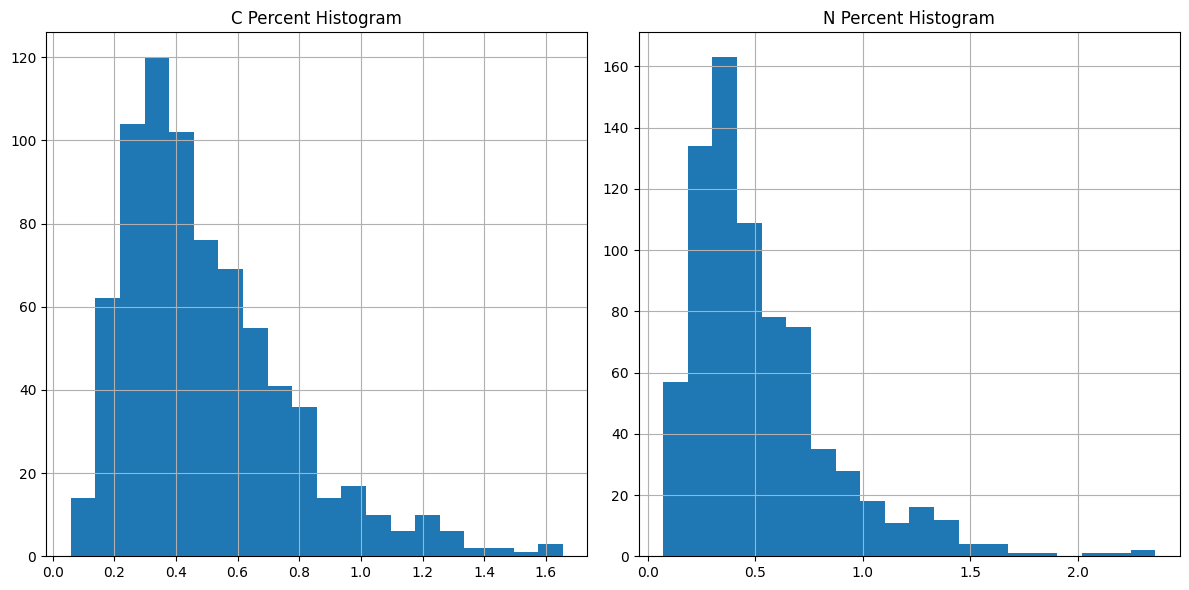

In [31]:
# Combine descriptive statistics into one table
c_stats = df['c_percent'].describe().to_frame().T
n_stats = df['n_percent'].describe().to_frame().T
combined_stats = pd.concat([c_stats, n_stats], axis=0)
combined_stats.index = ['C Percent', 'N Percent']
print(combined_stats)

# Create subplots for histograms
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Histogram for C Percent
df.hist(column='c_percent', bins=20, ax=axs[0])
axs[0].set_title('C Percent Histogram')

# Histogram for N Percent
df.hist(column='n_percent', bins=20, ax=axs[1])
axs[1].set_title('N Percent Histogram')

plt.tight_layout()
plt.show()

# Fit functions onto the data

In [32]:
# function to make random points in a cylinder

def random_points_in_cylinder(n, radius, height):
    """
    Generate random points within a cylinder.

    Parameters:
    n (int): Number of random points to generate.
    radius (float): Radius of the cylinder.
    height (float): Height of the cylinder.

    Returns:
    numpy.ndarray: An array of shape (n, 3) containing the random points.
                   Each point is represented by its (x, y, z) coordinates.
    """
    rs = radius * np.sqrt(np.random.rand(n))
    thetas = 2 * np.pi * np.random.rand(n)
    zs = height * np.random.rand(n)
    return np.column_stack((rs * np.cos(thetas), rs * np.sin(thetas), zs))

def sample_cyl_locs(cyl_locs, n_samples_per_cyl, core_radius, core_height, vertical_core_slices):
    """
    Generate a grid of points with no corners.

    Parameters:
    cyl_locs (numpy.ndarray): An array of shape (n, 3) where each row represents the center of a core.
    n_samples_per_cyl (int): The number of points to sample in each core.

    Returns:
    numpy.ndarray: An array of shape (n*n_samples_per_cyl, 3) where each row represents a point in 3D space.
    """
    cyl_points = np.zeros((len(cyl_locs), n_samples_per_cyl, 3))
    for i, loc in enumerate(cyl_locs):
        cyl_points[i] = random_points_in_cylinder(n_samples_per_cyl, core_radius, core_height/vertical_core_slices) + loc
    return cyl_points

def cyl_means(cyl_points, conc_func):
    """
    Generate cylinder locations for each core.

    Parameters:
    cyl_points (numpy.ndarray): An array of shape (n, m, 3) where each row represents the center of a core.

    Returns:
    numpy.ndarray: An array of shape (n) where each element represents the mean concentration of the core.
    """
    return np.array([np.mean(conc_func(core_points)) for core_points in cyl_points])

In [33]:
t = 1000
oz = np.concatenate([df['lower_bin'].to_numpy()]*t)
ox = np.concatenate([df['x'].to_numpy()]*t)
oy = np.concatenate([df['y'].to_numpy()]*t)
oc = np.concatenate([df['c_percent'].to_numpy()]*t)/100
on = np.concatenate([df['n_percent'].to_numpy()]*t)/100
n_o = len(oz)
o_pos = np.column_stack((ox, oy, oz))
o_pos = o_pos+random_points_in_cylinder(n_o, 1.9, 5)

ox = o_pos[:, 0]
oy = o_pos[:, 1]
oz = o_pos[:, 2]

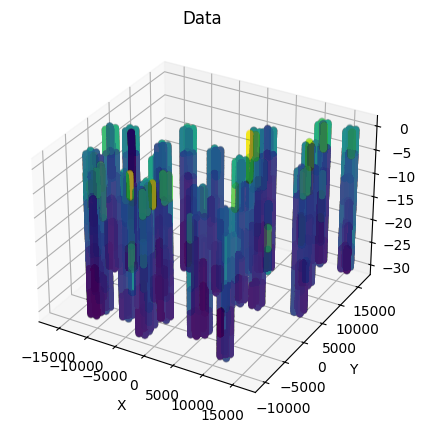

In [34]:
# 3d plot of the data
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ox, oy, oz, c=oc, cmap='viridis', alpha=0.01)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Data')
plt.show()

In [35]:
import functions as f

In [36]:

# fit the data to the functions
X = np.column_stack((ox, oy, oz))

chemicals = ['Carbon', 'Nitrogen', 'Silicon']

func_combo_1 = [f.const, f.const, f.identity]
initial_params_combo_1 = [[0], [0], [0]]

func_combo_2 = [f.linear, f.linear, f.identity]
initial_params_combo_2 = [[0, 0], [0, 0], [0]]

func_combo_3 = [f.plane, f.plane, f.identity]
initial_params_combo_3 = [[0, 0, 0, 0], [0, 0, 0, 0], [0]]

func_combo_4 = [f.quad, f.quad, f.identity]
initial_params_combo_4 = [[0, 0, 0, 0], [0, 0, 0, 0], [0]]

func_combo_5 = [f.quad_plane, f.quad_plane, f.identity]
initial_params_combo_5 = [[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0]]

func_combos = [func_combo_1, func_combo_2, func_combo_3, func_combo_4, func_combo_5]
initial_params_combos = [initial_params_combo_1, initial_params_combo_2, initial_params_combo_3, initial_params_combo_4, initial_params_combo_5]

# fit the functions separately
fit_results = []
infodicts = []
for i, func_combo in enumerate(func_combos):
    initial_params_combo = initial_params_combos[i]
    fit_results_combo = []
    step_infodict = []
    for j, func in enumerate(func_combo):
        initial_params = initial_params_combo[j]
        popt, infodict = f.fit_function(X, oc, func)
        infodict['chemical'] = chemicals[j]
        infodict['function'] = func
        infodict['function_name'] = func.__name__
        infodict['initial_params'] = initial_params
        infodict['final_params'] = popt
        infodict['combo'] = i
        infodict['func_id'] = j
        fit_results_combo.append([chemicals[j], popt, infodict])
        step_infodict.append(infodict)

    infodicts.append(step_infodict)
    fit_results.append(fit_results_combo)



/home/jac2462@uta.edu/Documents/USDASpring2025/KnownCoreVSMINS/functions.py:27: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _, infodict, __, ___ = scipy.optimize.curve_fit(func, X, y, full_output=True)


In [37]:
# infodicts is a list of lists of dictionaries make this into a single dictionary
all_infodicts = {}
for i, infodict in enumerate(infodicts):
    for j, step_infodict in enumerate(infodict):
        all_infodicts[(i, j)] = step_infodict

# make a dataframe of the infodicts
infodf = pd.DataFrame(all_infodicts).T
infodf.reset_index(inplace=True)
# infodf.rename(columns={'level_0': 'combo', 'level_1': 'func_id'}, inplace=True)
# infodf.set_index(['combo', 'func_id'], inplace=True)


In [38]:
infodf

,level_0,level_1,fvec,nfev,fjac,ipvt,qtf,chemical,function,function_name,initial_params,final_params,combo,func_id
0,0,0,"[-0.0060496125528156225, 0.0002425941377352533...",5,"[[-866.0254007804016, 0.0011547005382969865, 0...",[1],[-3.925748606400936e-10],Carbon,<function const at 0x774b9437a950>,const,[0],[0.004992609570236395],0,0
1,0,1,"[-0.0060496125528156225, 0.0002425941377352533...",5,"[[-866.0254007804016, 0.0011547005382969865, 0...",[1],[-3.925748606400936e-10],Nitrogen,<function const at 0x774b9437a950>,const,[0],[0.004992609570236395],0,1
2,0,2,"[0.9889577778769479, 0.9952499845674989, 0.996...",2,"[[-0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",[1],[0.9889577778769479],Silicon,<function identity at 0x774b9f1df880>,identity,[0],[1.0],0,2
3,1,0,"[-0.0033780782725408307, 0.0014018259056421513...",7,"[[15000.480619984179, 0.0006107446567067956, 0...","[1, 2]","[-1.943955776914988e-07, 1.772698074832893e-08]",Carbon,<function linear at 0x774b8fca97e0>,linear,"[0, 0]","[0.00019854263838325155, 0.007970782455369866]",1,0
4,1,1,"[-0.0033780782725408307, 0.0014018259056421513...",7,"[[15000.480619984179, 0.0006107446567067956, 0...","[1, 2]","[-1.943955776914988e-07, 1.772698074832893e-08]",Nitrogen,<function linear at 0x774b8fca97e0>,linear,"[0, 0]","[0.00019854263838325155, 0.007970782455369866]",1,1
5,1,2,"[0.9889577778769479, 0.9952499845674989, 0.996...",2,"[[-0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",[1],[0.9889577778769479],Silicon,<function identity at 0x774b9f1df880>,identity,[0],[1.0],1,2
6,2,0,"[-0.0032883005161699645, 0.0014916147637084997...",16,"[[-8263019.992749825, 0.0007174727402101196, 0...","[1, 2, 3, 4]","[5.220850314568981e-11, 1.2291768558027327e-07...",Carbon,<function plane at 0x774b8fcaa290>,plane,"[0, 0, 0, 0]","[1.527315653273866e-08, 1.1855792293698983e-10...",2,0
7,2,1,"[-0.0032883005161699645, 0.0014916147637084997...",16,"[[-8263019.992749825, 0.0007174727402101196, 0...","[1, 2, 3, 4]","[5.220850314568981e-11, 1.2291768558027327e-07...",Nitrogen,<function plane at 0x774b8fcaa290>,plane,"[0, 0, 0, 0]","[1.527315653273866e-08, 1.1855792293698983e-10...",2,1
8,2,2,"[0.9889577778769479, 0.9952499845674989, 0.996...",2,"[[-0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",[1],[0.9889577778769479],Silicon,<function identity at 0x774b9f1df880>,identity,[0],[1.0],2,2
9,3,0,"[-0.004398282733161234, 0.0014241449517361712,...",16,"[[-106429355979.00755, 0.00033023862040440125,...","[1, 2, 3, 4]","[-1.1375209051827165e-06, -4.3333445433335616e...",Carbon,<function quad at 0x774b8fca8790>,quad,"[0, 0, 0, 0]","[-4.091023257463597e-13, 3.686208270368513e-12...",3,0


In [39]:
# functions_list = infodf['function_name'].unique()
# for function in functions_list:
#     _df = infodf[infodf['function_name']==function]
#     _df =_df[_df['chemical']=='Carbon']
#     for i, row in _df.iterrows():
#         _func = row['function']
#         _params = row['final_params']
#         true = oc
#         pred = _func(o_pos, *_params)
        
#         fig = plt.figure(figsize=(15, 5))
        
#         # Normalize the color scale
#         norm = plt.Normalize(vmin=min(oc.min(), pred.min()), vmax=max(oc.max(), pred.max()))

#         ax = fig.add_subplot(131, projection='3d')
#         sc1 = ax.scatter(ox, oy, oz, c=oc, cmap='viridis', norm=norm, alpha=0.01)
#         ax.set_xlabel('X')
#         ax.set_ylabel('Y')
#         ax.set_zlabel('Z')
#         ax.set_title('Real Data')
#         cbar1 = plt.colorbar(sc1, ax=ax, pad=0.1)
#         cbar1.set_label('C Percent')

#         ax = fig.add_subplot(132, projection='3d')
#         sc2 = ax.scatter(ox, oy, oz, c=pred, cmap='viridis', norm=norm, alpha=0.01)
#         ax.set_xlabel('X')
#         ax.set_ylabel('Y')
#         ax.set_zlabel('Z')
#         ax.set_title('Predicted Data')
#         cbar2 = plt.colorbar(sc2, ax=ax, pad=0.1)
#         cbar2.set_label('C Percent')

#         ax = fig.add_subplot(133, projection='3d')
#         sc3 = ax.scatter(ox, oy, oz, c=oc-pred, cmap='viridis', alpha=0.01)
#         ax.set_xlabel('X')
#         ax.set_ylabel('Y')
#         ax.set_zlabel('Z')
#         ax.set_title('Residual Data')
#         cbar3 = plt.colorbar(sc3, ax=ax, pad=0.1)
#         cbar3.set_label('Residual C Percent')

#         plt.show()

In [40]:
functions_list = ['const', 'linear', 'plane', 'quad', 'quad_plane']
stds = []
for idx, function in enumerate(functions_list):
    _df = infodf[infodf['function_name'] == function]
    _df = _df[_df['chemical'] == 'Carbon']
    for i, row in _df.iterrows():
        _func = row['function']
        _params = row['final_params']
        true = oc
        pred = _func(o_pos, *_params)
        print(pred.shape)
        std = (oc-pred)
        # np.random.multivariate_normal(mean, cov)
        stds.append(std)


(750000,)
(750000,)
(750000,)
(750000,)
(750000,)


(array([[     0.,   9000., 181000., 253000., 151000.,  88000.,  38000.,
          17000.,   9000.,   4000.],
        [  1289.,   3276., 104704., 313949., 211834.,  77157.,  25367.,
           6668.,   5315.,    441.],
        [  1113.,   3325., 105558., 309640., 214933.,  77484.,  25704.,
           6649.,   5210.,    384.],
        [     0.,   5624., 121612., 284165., 218216.,  79569.,  25051.,
           9600.,   5068.,   1095.],
        [  1087.,   5900.,  90658., 326342., 217566.,  73080.,  24990.,
           5332.,   4618.,    427.]]),
 array([-7.75359912e-03, -5.82248825e-03, -3.89137737e-03, -1.96026650e-03,
        -2.91556306e-05,  1.90195524e-03,  3.83306611e-03,  5.76417699e-03,
         7.69528786e-03,  9.62639873e-03,  1.15575096e-02]),
 <a list of 5 BarContainer objects>)

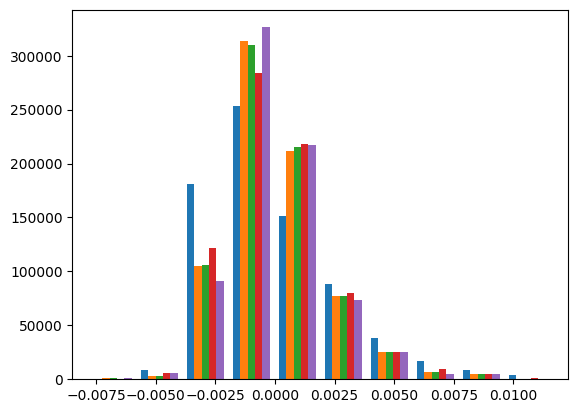

In [41]:
plt.hist(stds, bins=10)

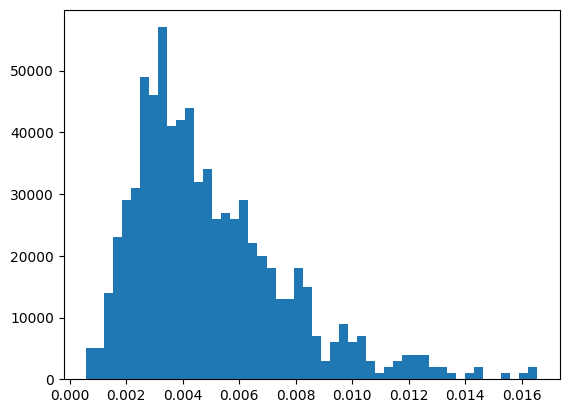

In [112]:
hist = plt.hist(oc, bins=50)
avg = np.mean(oc)
# sample from the histogram as a distribution function
plt.show()

In [138]:
def sample_from_hist(n_samples, hist=hist, avg=avg):
    bins = hist[1]
    bin_width = bins[1]-bins[0]
    bin_centers = bins[:-1]+bin_width/2
    probs = hist[0]/np.sum(hist[0])
    samples = (np.random.choice(bin_centers, n_samples, p=probs)-avg)/2
    return samples

In [139]:
hist_df = pd.DataFrame(hist).T
hist_df = hist_df.iloc[:, :-1]
hist_df.columns = ['count', 'bin']
hist_df.to_csv('data/hist.csv', index=False)

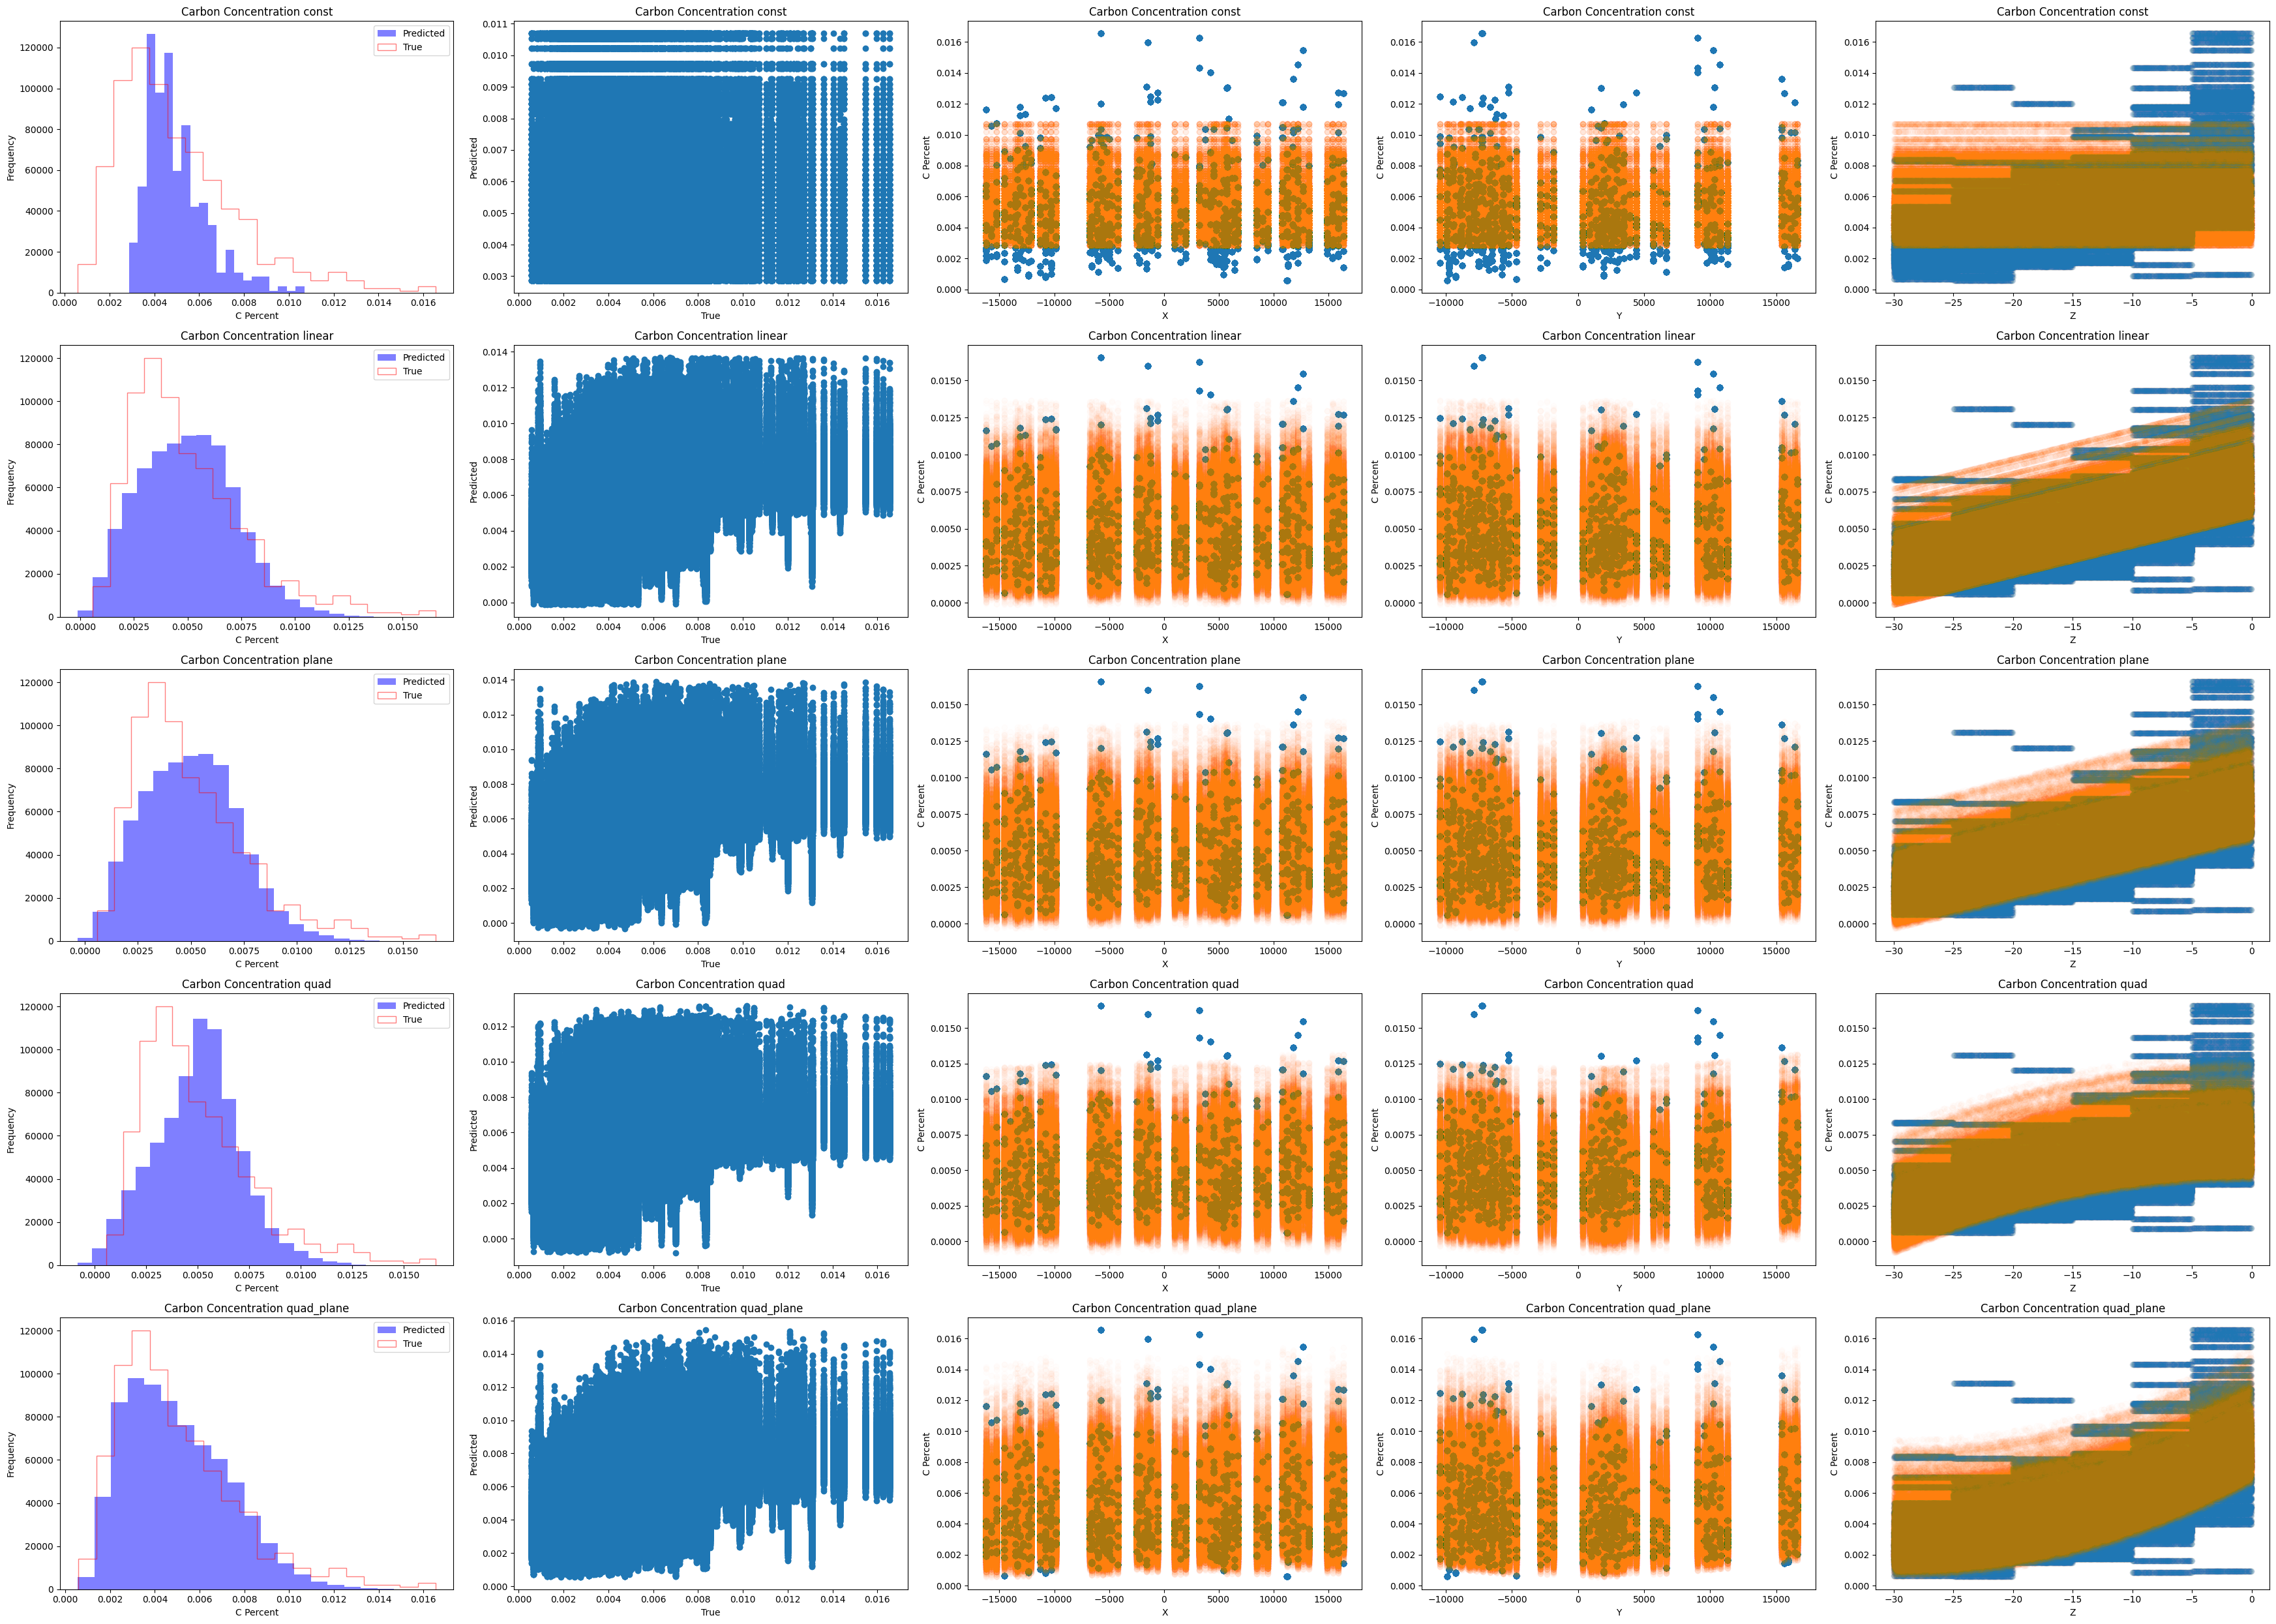

In [140]:
functions_list = ['const', 'linear', 'plane', 'quad', 'quad_plane']
fig, axs = plt.subplots(len(functions_list), 5, figsize=(35, 5 * len(functions_list)), dpi=100)

for idx, function in enumerate(functions_list):
    _df = infodf[infodf['function_name'] == function]
    _df = _df[_df['chemical'] == 'Carbon']
    for i, row in _df.iterrows():
        _func = row['function']
        _params = row['final_params']
        true = oc
        pred = _func(o_pos, *_params)
        pred = pred + sample_from_hist(len(pred))

        # Plot the distribution of the predicted values
        axs[idx, 0].hist(pred, bins=20, color='blue', alpha=0.5, label='Predicted')
        axs[idx, 0].hist(true, bins=20, color='red', alpha=0.5, label='True', histtype='step')
        axs[idx, 0].set_xlabel('C Percent')
        axs[idx, 0].set_ylabel('Frequency')
        axs[idx, 0].legend()
        axs[idx, 0].set_title(row['chemical'] + ' Concentration' + ' ' + row['function_name'])

        # Scatter plot of true vs predicted
        axs[idx, 1].scatter(true, pred)
        axs[idx, 1].set_xlabel('True')
        axs[idx, 1].set_ylabel('Predicted')
        axs[idx, 1].set_title(row['chemical'] + ' Concentration' + ' ' + row['function_name'])

        # Scatter plot of X vs C Percent
        axs[idx, 2].scatter(ox, true, alpha=0.01)
        axs[idx, 2].scatter(ox, pred, alpha=0.01)
        axs[idx, 2].set_xlabel('X')
        axs[idx, 2].set_ylabel('C Percent')
        axs[idx, 2].set_title(row['chemical'] + ' Concentration' + ' ' + row['function_name'])

        # Scatter plot of Y vs C Percent
        axs[idx, 3].scatter(oy, true, alpha=0.01)
        axs[idx, 3].scatter(oy, pred, alpha=0.01)
        axs[idx, 3].set_xlabel('Y')
        axs[idx, 3].set_ylabel('C Percent')
        axs[idx, 3].set_title(row['chemical'] + ' Concentration' + ' ' + row['function_name'])

        # Scatter plot of Z vs C Percent
        axs[idx, 4].scatter(oz, true, alpha=0.01)
        axs[idx, 4].scatter(oz, pred, alpha=0.01)
        axs[idx, 4].set_xlabel('Z')
        axs[idx, 4].set_ylabel('C Percent')
        axs[idx, 4].set_title(row['chemical'] + ' Concentration' + ' ' + row['function_name'])

plt.tight_layout()
plt.show()


In [ ]:
# # make a dataframe with columns 'combo_id', 'combo', carbon_func, nitrogen_func, carbon_params, nitrogen_params
# # the combo_id is the index of the combo
# # the combo is the list of functions used in the combo
# # carbon_func is the function used to predict carbon
# # nitrogen_func is the function used to predict nitrogen
# # carbon_params is the parameters of the carbon function
# # nitrogen_params is the parameters of the nitrogen function

# combos = []
# for i, fit_result in enumerate(fit_results):
#     carbon_func = fit_result[0][2]['function']
#     nitrogen_func = fit_result[1][2]['function']
#     carbon_params = fit_result[0][1]
#     nitrogen_params = fit_result[1][1]
#     combos.append([i, functions_list[i], carbon_func, nitrogen_func, carbon_params, nitrogen_params])

# combos_df = pd.DataFrame(combos, columns=['combo_id', 'combo', 'carbon_func', 'nitrogen_func', 'carbon_params', 'nitrogen_params'])
# combos_df

,combo_id,combo,carbon_func,nitrogen_func,carbon_params,nitrogen_params
0,0,const,<function const at 0x79481ce15480>,<function const at 0x79481ce15480>,[0.004992609570236395],[0.004992609570236395]
1,1,linear,<function linear at 0x79480478bd00>,<function linear at 0x79480478bd00>,"[0.00019862192575141282, 0.007971863609826437]","[0.00019862192575141282, 0.007971863609826437]"
2,2,plane,<function plane at 0x79480478b490>,<function plane at 0x79480478b490>,"[1.5303714398684165e-08, 9.667953700526266e-11...","[1.5303714398684165e-08, 9.667953700526266e-11..."
3,3,quad,<function quad at 0x79480bf37640>,<function quad at 0x79480bf37640>,"[-4.1382608135894603e-13, 3.689119991081925e-1...","[-4.1382608135894603e-13, 3.689119991081925e-1..."
4,4,quad_plane,<function quad_plane at 0x79480bf37c70>,<function quad_plane at 0x79480bf37c70>,"[-1.8475158769238626e-13, 3.738134677365824e-1...","[-1.8475158769238626e-13, 3.738134677365824e-1..."


In [ ]:
# # save dataframe to pickle
# combos_df.to_pickle('data/massfunctions.pkl')
